In [1]:
import pandas as pd
import locale
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
inflation_dict = {1985: 2.2, 1986: 2.16, 1987: 2.08, 1988: 2.0, 1989: 1.91, 1990: 1.81, 1991: 1.74, 1992: 1.69,
                  1993: 1.64, 1994: 1.6, 1995: 1.55, 1996: 1.51, 1997: 1.47, 1998: 1.45, 1999: 1.42, 2000: 1.37,
                  2001: 1.34, 2002: 1.32, 2003: 1.29, 2004: 1.25, 2005: 1.21, 2006: 1.17, 2007: 1.14, 2008: 1.1,
                  2009: 1.1, 2010: 1.09, 2011: 1.05, 2012: 1.03, 2013: 1.02, 2014: 1.0}

In [3]:
inflation = [2.2, 2.16, 2.08, 2.0, 1.91, 1.81, 1.74, 1.69, 1.64, 1.6, 1.55, 1.51, 1.47, 1.45, 1.42, 1.37, 1.34, 1.32, 1.29, 1.25, 1.21, 1.17, 1.14, 1.1, 1.1, 1.09, 1.05, 1.03, 1.02, 1.0]
year = [1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
infl_x_year = {}
for num in range(len(year)):
    infl_x_year[year[num]] = inflation[num]

In [4]:
batting = pd.read_csv("data/batting.csv")
batting = batting[["playerID", "AB", "H", "BB", "HBP", "SF", "yearID"]]

pitching = pd.read_csv("data/Pitching.csv")
pitching = pitching[["playerID", "yearID", "W", "L", "ERA"]]

position = pd.read_csv("data/Appearances.csv")
position = position[["playerID","teamID", "yearID","G_all", "G_p", "G_c", "G_1b", "G_2b", "G_3b",
                     "G_ss", "G_lf", "G_cf", "G_rf", "G_of"]]

name = pd.read_csv("data/Master.csv")
name = name[["playerID", "nameLast", "nameGiven"]]

salary = pd.read_csv("data/Salaries.csv")
salary = salary[["playerID", "salary", "yearID"]]

In [5]:
master_list = pd.merge(batting, position, how="outer", on = ["playerID", "yearID"])
master_list = pd.merge(master_list, pitching, how="outer", on = ["playerID", "yearID"])
master_list = pd.merge(master_list, salary, how="outer", on = ["playerID", "yearID"])
master_list = pd.merge(master_list, name, how="outer", on = "playerID")
master_list.index = master_list.pop("playerID")
master_list.index = master_list.pop("nameLast")
master_list = master_list[master_list.yearID >= 1985]
master_list = master_list[pd.notnull(master_list['salary'])]

In [6]:
master_list['infl_sal'] = 0
for row in range(len(master_list.yearID)):
    master_list['infl_sal'][row] = master_list.salary[row] * inflation_dict[master_list.yearID[row]]

/Users/MatthewBarnette/iron_yard_hw/moneyball/.direnv/python-3.5.0/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [7]:
pitchers = master_list[master_list.G_p >= 32]
pitchers.insert(3, "POS", "P")

catchers = master_list[master_list.G_c >= 81]
catchers.insert(3, "POS", "C")

first_base = master_list[master_list.G_1b >= 81]
first_base.insert(3, "POS", "1B")

second_base = master_list[master_list.G_2b >= 81]
second_base.insert(3, "POS", "2B")

third_base = master_list[master_list.G_3b >= 81]
third_base.insert(3, "POS", "3B")

short_stop = master_list[master_list.G_ss >= 81]
short_stop.insert(3, "POS", "SS")

left_field = master_list[master_list.G_lf >= 81]
left_field.insert(3, "POS", "LF")

center_field = master_list[master_list.G_cf >= 81]
center_field.insert(3, "POS", "CF")

right_field = master_list[master_list.G_rf >= 81]
right_field.insert(3, "POS", "RF")

In [8]:
pitchers = pitchers.dropna(how="any")
pitchers = pitchers.sort(columns = "yearID", axis = 0, ascending = True)

In [9]:
master_list = pd.concat([catchers, first_base, second_base, third_base, short_stop, left_field, center_field,
                         right_field])
for_averages = pd.concat([pitchers, catchers, first_base, second_base, third_base, short_stop, left_field,
                          center_field, right_field])

In [10]:
master_list = master_list.drop(["G_all", "G_p", "G_c", "G_1b", "G_2b", "G_3b", "G_ss", "G_lf", "G_cf", "G_rf",
                                "G_of", "W", "L", "ERA"], axis=1)

for_averages = for_averages.drop(["G_all", "G_p", "G_c", "G_1b", "G_2b", "G_3b", "G_ss", "G_lf", "G_cf", "G_rf",
                                  "G_of", "W", "L", "ERA"], axis=1)

pitchers = pitchers.drop(["G_all", "G_p", "G_c", "G_1b", "G_2b", "G_3b", "G_ss", "G_lf", "G_cf", "G_rf", "G_of"],
                         axis=1)

In [11]:
pitchers = pitchers.sort(columns = "yearID", axis = 0, ascending = True)
pitchers = pitchers.dropna(how="any")

master_list = master_list.sort(columns="yearID", axis = 0, ascending = True)
master_list = master_list.dropna(how="any")

for_averages = for_averages.sort(columns="yearID", axis = 0, ascending = True)
for_averages = for_averages.dropna(how="any")

In [12]:
master_list["OBA"] = (master_list.H + master_list.BB + master_list.HBP)/(master_list.AB + master_list.BB + master_list.HBP + master_list.SF)
pitchers["OBA"] = (pitchers.H + pitchers.BB + pitchers.HBP)/(pitchers.AB + pitchers.BB + pitchers.HBP + pitchers.SF)
for_averages["OBA"] = (for_averages.H + for_averages.BB + for_averages.HBP)/(for_averages.AB + for_averages.BB + for_averages.HBP + for_averages.SF)

In [13]:
pitchers = pitchers.dropna(how="any")
pitchers = pitchers[pitchers.OBA != 0.0]
pitchers = pitchers[pitchers.AB >= 50]
pitchers = pitchers.drop_duplicates()
pitchers = pitchers.sort(columns="OBA", axis=0, ascending=False)

master_list = master_list.dropna(how="any")
master_list = master_list[master_list.OBA != 0.0]
master_list = master_list[master_list.AB >= 300]
master_list = master_list.drop_duplicates()
master_list = master_list.sort(columns="OBA", axis=0, ascending=False)

for_averages = for_averages.dropna(how="any")

In [14]:
std_OBA = for_averages["OBA"].std(axis=0)
average_OBA = for_averages["OBA"].mean(axis=0)
std_salary = for_averages["infl_sal"].std(axis=0)
average_salary = for_averages["infl_sal"].mean(axis=0)

In [15]:
master_list["z_OBA"] = (master_list.OBA - average_OBA)/std_OBA
master_list["z_infl_sal"] = (master_list.infl_sal - average_salary)/std_salary

pitchers["z_OBA"] = (pitchers.OBA - average_OBA)/std_OBA
pitchers["z_infl_sal"] = (pitchers.infl_sal - average_salary)/std_salary

In [16]:
master_list["z_OBA_sal"] = master_list["z_OBA"] - master_list["z_infl_sal"]

pitchers["z_OBA_sal"] = pitchers["z_OBA"] - pitchers["z_infl_sal"]

In [17]:
master_list = master_list.sort(columns="z_OBA_sal", axis = 0, ascending = False)
master_list = master_list[master_list.z_OBA_sal > 0.0]

pitchers = pitchers.sort(columns="z_OBA_sal", axis = 0, ascending = False)
pitchers = pitchers[pitchers.W > 10]
pitchers = pitchers[pitchers.W > pitchers.L]

In [18]:
catchers = master_list[master_list["POS"] == "C"]
first_base = master_list[master_list["POS"] == "1B"]
second_base = master_list[master_list["POS"] == "2B"]
third_base = master_list[master_list["POS"] == "3B"]
short_stop = master_list[master_list["POS"] == "SS"]
left_field = master_list[master_list["POS"] == "LF"]
center_field = master_list[master_list["POS"] == "CF"]
right_field = master_list[master_list["POS"] == "RF"]

In [19]:
my_team = pd.concat([pitchers.head(1), catchers.head(1), first_base.head(1), second_base.head(1), third_base.head(1), short_stop.head(1), left_field.head(1), center_field.head(1), right_field.head(1)])
my_team_avg_OBA = my_team["OBA"].mean(axis=0)
my_team_avg_sal = my_team["infl_sal"].mean(axis=0)

/Users/MatthewBarnette/iron_yard_hw/moneyball/.direnv/python-3.5.0/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


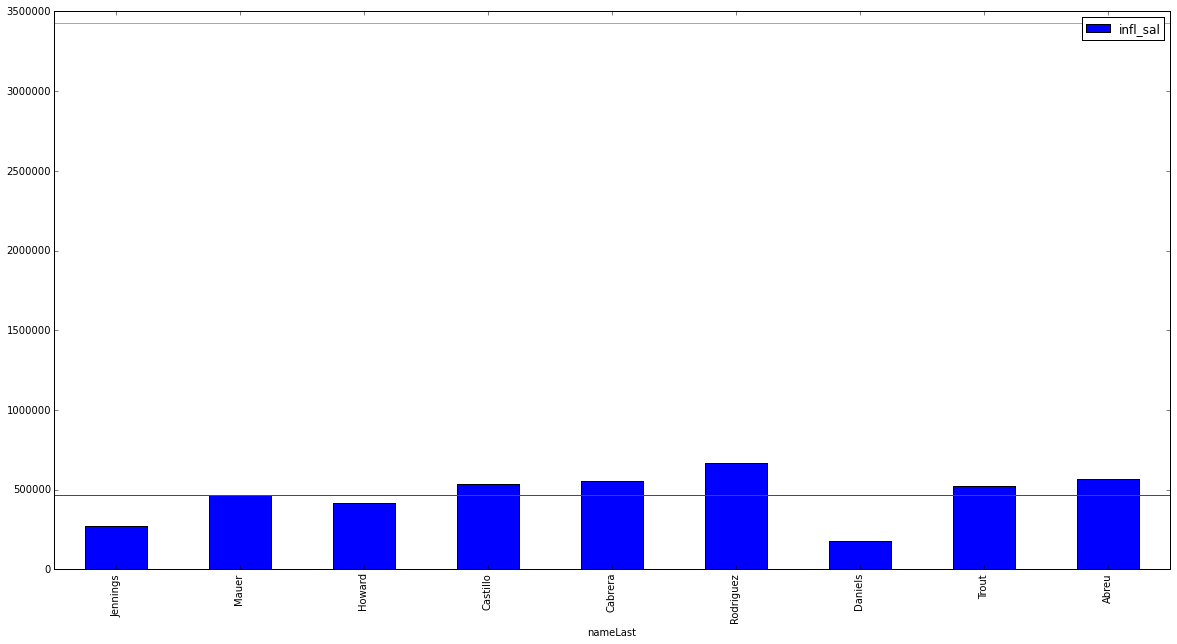

In [20]:
my_teams_sal = my_team[["infl_sal"]].plot(kind="bar", figsize=(20, 10))
xmin, xmax = my_teams_sal.get_xlim()
my_teams_sal.hlines(y = [my_team_avg_sal, average_salary],xmin=xmin, xmax=xmax, color=['r', 'y'])

In the above graph the yellow line is the average inflated salary (to 2014 standards) across the MLB from 1985 to 2014, the red line is my teams average inflated salary.

/Users/MatthewBarnette/iron_yard_hw/moneyball/.direnv/python-3.5.0/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


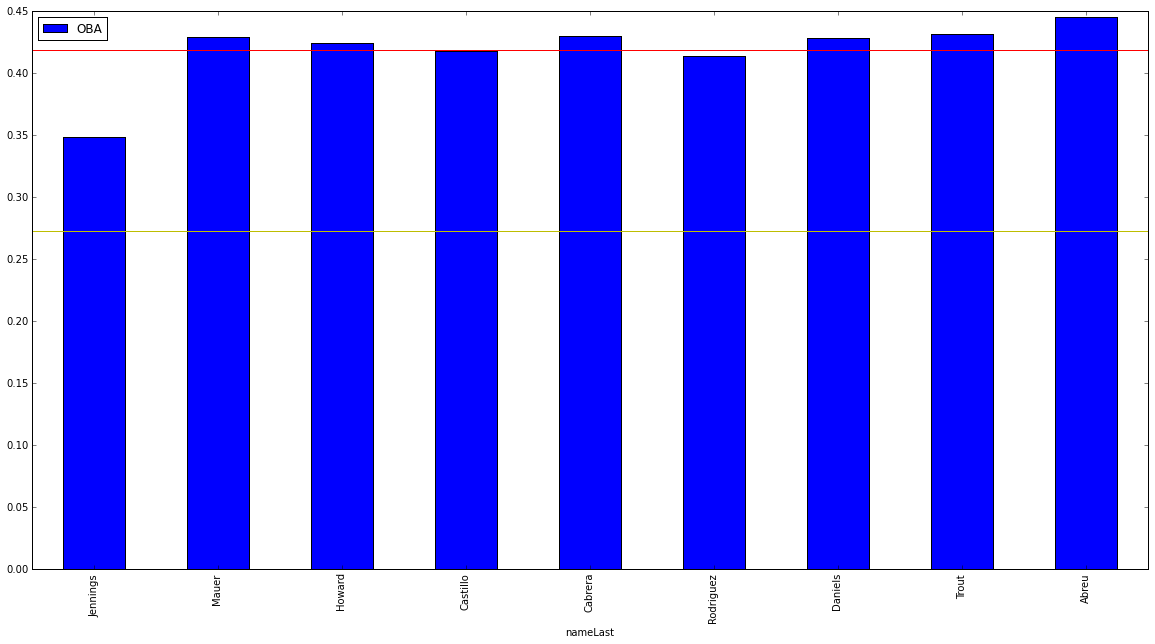

In [21]:
my_teams_OBA = my_team[["OBA"]].plot(kind="bar", figsize=(20, 10))
xmin, xmax = my_teams_OBA.get_xlim()
my_teams_OBA.hlines(y = [my_team_avg_OBA, average_OBA],xmin=xmin, xmax=xmax, color=['r', 'y'])

In the above graph the yellow line is the OBA across the MLB for 1985-2014, the red line is my teams OBA.

In [22]:
my_team

,AB,BB,ERA,H,HBP,L,OBA,POS,SF,W,infl_sal,nameGiven,salary,teamID,yearID,z_OBA,z_OBA_sal,z_infl_sal
nameLast,,,,,,,,,,,,,,,,,,
Jennings,62,3,4.52,19,1,8,0.348485,P,0,16,271920,Jason Ryan,206000,COL,2002,0.470155,1.195310,-0.725155
Mauer,521,79,NaN,181,1,NaN,0.429276,C,7,NaN,468000,Joseph Patrick,400000,MIN,2006,0.970651,1.650775,-0.680124
Howard,581,108,NaN,182,9,NaN,0.424716,1B,6,NaN,415350,Ryan James,355000,PHI,2006,0.942400,1.634615,-0.692215
Castillo,539,78,NaN,180,0,NaN,0.418152,2B,0,NaN,534300,Luis Antonio,390000,FLO,2000,0.901739,1.566637,-0.664897
Cabrera,576,86,NaN,195,10,NaN,0.430473,3B,4,NaN,552240,Jose Miguel,472000,FLO,2006,0.978067,1.638844,-0.660777
Rodriguez,601,59,NaN,215,4,NaN,0.414307,SS,7,NaN,667924,Alexander Emmanuel,442334,SEA,1996,0.877918,1.512128,-0.634210
Daniels,368,60,NaN,123,1,NaN,0.428904,LF,0,NaN,179920,Kalvoski,86500,CIN,1987,0.968347,1.714631,-0.746283
Trout,589,110,NaN,190,9,NaN,0.431564,CF,8,NaN,520200,Michael Nelson,510000,LAA,2013,0.984825,1.652960,-0.668136
Abreu,546,109,NaN,183,3,NaN,0.445619,RF,4,NaN,568000,Bob Kelly,400000,PHI,1999,1.071895,1.729053,-0.657158
